In [1]:
import pandas as pd
import pyreadstat
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
from sklearn.model_selection import cross_val_score
from sklearn import linear_model 
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell
import sys
from sklearn.svm import LinearSVC
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score)
from sklearn.metrics import mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
#from sklearn.metrics import balanced_accuracy_score
#pandas library for reading data
import pandas as pd
#numpy library for computation with matrices and arrays
import numpy as np
#matplotlib library for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#command for displaying visualizations within the notebook
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score,log_loss
import seaborn as sns
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
#from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore') # to supress warnings
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
#Import libraries:
#from sklearn.preprocessing import Imputer
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, f_classif

from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Read data

In [2]:
df,meta=pyreadstat.read_sav("RMHS_General_Rescape_database_2018 1.sav", apply_value_formats=True, 
                            formats_as_category=True)
df.head()

,surveyid_1i1,Age_group_General,caracteristic,Age_group_rescap,surveyid_1i4,surveyid_1i5,surveyid_1i6,surveyid_1i8,enum_code,province,Residence_ID,district,sector,cell,village,estimate_wt,hh_rank,full_code,hh_code,full_code_1,hh_code_1,consent,survey_signature,surveyid_1i2_a,surveyid_1i2_b,surveyid_1i2_c,surveyid_1i2,surveyid_1i2_a_2,surveyid_1i2_b_2,surveyid_1i2_c_2,surveyid_1i2_1,surveyid_1i2a,surveyid_1i3,surveyid_1i7_1,survey_II,surveygroup1a1a,surveygroup1a1b,surveygroup1a2a,surveygroup1a2b,surveygroup1group_a1a3a1,surveygroup1group_a1a3b1,surveygroup1group_a1a3c1,surveygroup1group_a1a3d1,surveygroup1group_a1a3e1,surveygroup1group_a1a3f1,surveygroup1group_a1a3g1,surveygroup1group_a1a4a,surveygroup1group_a1a3a2,surveygroup1group_a1a3b2,surveygroup1group_a1a3c2,surveygroup1group_a1a3d2,surveygroup1group_a1a3e2,surveygroup1group_a1a3f2,surveygroup1group_a1a3g2,surveygroup1group_a1a3a3,surveygroup1group_a1a3b3,surveygroup1group_a1a3c3,surveygroup1group_a1a3d3,surveygroup1group_a1a3e3,surveygroup1group_a1a3f3,surveygroup1group_a1a3g3,surveygroup1group_a1a4_a,surveygroup1group_a1a4b,surveygroup1group_a1a5a,surveygroup1group_a1a5b,surveygroup1group_a1a6,surveygroup1group_a1a_a_b,survey_groupb_note_2,surveygroupbb1,surveygroupbb1a,surveygroupbb1b,surveygroupbb2,surveygroupbb3,surveygroupbb3a,surveygroupbb3b,surveygroupbb4,surveygroupbb4a,surveygroupbb4b,surveygroupbb5,surveygroupbb6,surveygroupbb7,surveygroupbb8,surveygroupbb9,surveygroupbb10,surveygroupbb10a,surveygroupbb10b,surveygroupbb11,surveygroupbb11a,surveygroupbb11b,surveygroupbb12,surveygroupbb12a,surveygroupbb12b,surveygroupbb12c,surveygroupbb12d,surveygroupbb13,surveygroupbb14,surveygroupbb14a,surveygroupbb14b,surveygroupbb14c,surveygroupbb15,surveygroupbb16,surveygroupbb16a,surveygroupbb16b,surveygroupbb16c,surveygroupbb16c_1,surveygroupbb17,surveygroupbb17a,surveygroupbb17b,surveygroupbb18,surveygroupbb_calc,summary_b,survey_groupc_note3,surveygroupcc0_1,surveygroupcc0_2,surveygroupcc0_2_7,surveygroupcc1a,surveygroupcc1b,surveygroupcc2a,surveygroupcc2b,surveygroupcc0_groupc3_1c3a_1_0,surveygroupcc0_groupc3_1c3a1,surveygroupcc0_groupc3_1c3b1,surveygroupcc0_groupc3_1c3c1,surveygroupcc0_groupc3_1c3d1,surveygroupcc0_groupc3_1c3e1,surveygroupcc0_groupc3_1c3f1,surveygroupcc0_groupc3_1c3g1,surveygroupcc0_groupc3_2c3a_2_0,surveygroupcc0_groupc3_2c3a2,surveygroupcc0_groupc3_2c3b2,surveygroupcc0_groupc3_2c3c2,surveygroupcc0_groupc3_2c3d2,surveygroupcc0_groupc3_2c3e2,surveygroupcc0_groupc3_2c3f2,surveygroupcc0_groupc3_2c3g2,surveygroupcc0_groupc3_3c3a_3_0,surveygroupcc0_groupc3_3c3a3,surveygroupcc0_groupc3_3c3b3,surveygroupcc0_groupc3_3c3c3,surveygroupcc0_groupc3_3c3d3,surveygroupcc0_groupc3_3c3e3,surveygroupcc0_groupc3_3c3f3,surveygroupcc0_groupc3_3c3g3,surveygroupcc0_groupc3_3_summary,surveygroupcc0_groupc3_1_summary,surveygroupcc0_groupc3_2_summary,surveygroupcc0_groupc3_summary,surveygroupcc0_groupc4,surveygroupcc0_groupc5,surveygroupcc0_groupc6,surveygroupcc0_groupc7,surveygroupcc0_groupc8a,surveygroupcc0_groupc8b,surveygroupcc0_groupc8c,survey_groupd_note5,surveygroupdd1a,surveygroupdd1b,surveygroupdd2,surveygroupdd3,surveygroupdd4_0d4,surveygroupdd4_0d4a,surveygroupdd4_0d4b,surveygroupdd4_0d4c,surveygroupdd4_0d4d,surveygroupdd4_0d4e,surveygroupdd4_0d4f,surveygroupdd4_0d4g,surveygroupdd4_0d4h,surveygroupdd4_0d4i,surveygroupdd4_0d4j,surveygroupdd4_0d4k,surveygroupdd4_0d4l,surveygroupdd4_0d4m,surveygroupdd4_0d6,surveygroupdd4_0d5,survey_note7,surveyf1,surveygroupff2,surveygroupff3,surveygroupff4,surveygroupff5,surveygroupff6,surveyf_summary,survey_groupg_note8,surveygroupgg1a,surveygroupgg1b,surveygroupgg2,surveygroupgg3a,surveygroupgg3b,surveygroupgg4,surveyg_summary,survey_grouph_note9,surveygrouphh1,surveygrouphh2,surveygrouphh_grouph4h4_0,surveygrouphh_grouph4h3a,surveygrouphh_grouph4h3b,surveygrouphh_grouph4h4a,surveygrouphh_grouph4h4b,surveygrouphh_grouph4h4c,surveygrouphh_grouph4h4d,surveygrouphh_grouph4h4e,surveygrouphh_grouph4h4f,surveygrouphh_grouph4h4g,surveygro

In [3]:
df.isna().sum()

surveyid_1i1             0
Age_group_General     1271
caracteristic         1401
Age_group_rescap     19110
surveyid_1i4             0
                     ...  
violence                 0
loss_dear                0
affiliation_group        0
alcol_drug               0
filter_$                 0
Length: 607, dtype: int64

In [4]:
df['surveygroupjj1b_1j1a_7'].value_counts()

surveygroupjj1b_1j1a_7
No     362
Yes      7
Name: count, dtype: int64

# EDA

# Extract youth data from whole dataset

In [5]:


# combine age from survival and general populations
df['age']=df['surveyid_1i2_a'].fillna(df['surveyid_1i2_a_2'])
df1 = df[(df['age']>14) & (df['age']<25)]

In [6]:
df1.columns

Index(['surveyid_1i1', 'Age_group_General', 'caracteristic',
       'Age_group_rescap', 'surveyid_1i4', 'surveyid_1i5', 'surveyid_1i6',
       'surveyid_1i7', 'surveyid_1i8', 'enumerator',
       ...
       'mdd_sychotic_feature', 'Q_EPILEPSY', 'bipolar_global',
       'final_any_mental_disoder', 'violence', 'loss_dear',
       'affiliation_group', 'alcol_drug', 'filter_$', 'age'],
      dtype='object', length=608)

# Extract the required variables

In [7]:
Needed_cols=['surveyid_1i1','surveyid_1i4','surveyid_1i5', 'surveyid_1i6','surveyid_1i7', 
              'age','surveyr1','surveys1','time_of_alcol','violence','experience_Trauma',
            'loss_dear', 'affiliation_group', 'alcol_drug']

In [10]:
# combine age from survival and general populations
df['age']=df['surveyid_1i2_a'].fillna(df['surveyid_1i2_a_2'])
df1 = df[(df['age']>14) & (df['age']<25)]

In [11]:
data = df1[Needed_cols]

In [12]:
#Rename columns

In [13]:
data.columns=['Sex','education','marital status','employment','religion','age',
              'Mental health history','Medical condition experience','heavy drinking','violence experience',
              'trauma experience','lifetime loss','affiliation pro-social group',
              'family history mental illness']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5221 entries, 0 to 20380
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Sex                            5221 non-null   category
 1   education                      5221 non-null   category
 2   marital status                 5221 non-null   category
 3   employment                     5221 non-null   category
 4   religion                       5221 non-null   category
 5   age                            5221 non-null   float64 
 6   Mental health history          5221 non-null   category
 7   Medical condition experience   5221 non-null   category
 8   heavy drinking                 5221 non-null   category
 9   violence experience            5221 non-null   category
 10  trauma experience              5221 non-null   category
 11  lifetime loss                  5221 non-null   category
 12  affiliation pro-social group   5221 no

In [15]:
data.head()

,Sex,education,marital status,employment,religion,age,Mental health history,Medical condition experience,heavy drinking,violence experience,trauma experience,lifetime loss,affiliation pro-social group,family history mental illness
0,Male,Primary school,Never married,Salaried employee,Christian,24.0,No,No,No,No,No,No,No,No
7,Male,Secondary/TVET,Never married,Under age of laborforce,Christian,20.0,No,No,No,No,No,No,Yes,No
14,Male,Secondary/TVET,Never married,Under age of laborforce,Christian,21.0,No,No,No,No,No,No,Yes,Yes
15,Female,Primary school,Never married,Under age of laborforce,Christian,19.0,No,No,No,No,No,Yes,No,Yes
18,Male,Primary school,Never married,Under age of laborforce,Christian,15.0,No,No,No,No,No,No,No,No


In [16]:
disorders=['MDE_grobal','sbd','PANIC_DISORDER_GLOBAL','SOCIAL_ANXIETY_final','obsessive_compulsive','PTSD','MANIC_GLOBAL',
           'HYPOMANIC_global','I_ALCOHOL_DISORDER', 'J_DRUG_USE_DISORDER','P_LIFETIME_APD',
           'bipolar_global']


In [17]:
#data.describe(include='object').T


In [18]:
dfs=df1[disorders]
dfs.columns=['MAJOR DEPRESSIVE EPISODE','SUICIDAL BEHAVIOR DISORDER','PANIC DISORDER','SOCIAL PHOBIA',
             'OBSESSIVE COMPULSIVE DISORDER','POSTTRAUMATIC STRESS DISORDER','MANIC EPISODE',
             'HYPOMANIC EPISODE','ALCOHOL USE DISORDER','SUBSTANCE USE DISORDER'
             ,'ANTISOCIAL PERSONALITY DISORDER','BIPOLAR DISORDER']
dfs.to_excel('mental_disorders.xlsx')
dfs.head()


,MAJOR DEPRESSIVE EPISODE,SUICIDAL BEHAVIOR DISORDER,PANIC DISORDER,SOCIAL PHOBIA,OBSESSIVE COMPULSIVE DISORDER,POSTTRAUMATIC STRESS DISORDER,MANIC EPISODE,HYPOMANIC EPISODE,ALCOHOL USE DISORDER,SUBSTANCE USE DISORDER,ANTISOCIAL PERSONALITY DISORDER,BIPOLAR DISORDER
0,No,No,No,No,No,No,No,No,No,No,No,No
7,No,No,No,No,No,No,No,No,No,No,No,No
14,No,No,No,No,No,No,No,No,No,No,No,No
15,No,No,No,No,Yes,No,No,No,No,No,No,No
18,No,No,No,No,No,No,No,No,No,No,No,No


In [19]:
# Convert to lowercase to avoid case mismatches
dfs = dfs.apply(lambda x: x.str.lower())

# Count 'yes' in each column
yes_counts = (dfs == 'yes').sum()

print("Count of 'yes' in each column:")
print(yes_counts)

Count of 'yes' in each column:
MAJOR DEPRESSIVE EPISODE           347
SUICIDAL BEHAVIOR DISORDER          27
PANIC DISORDER                     310
SOCIAL PHOBIA                       69
OBSESSIVE COMPULSIVE DISORDER      134
POSTTRAUMATIC STRESS DISORDER      104
MANIC EPISODE                        5
HYPOMANIC EPISODE                    4
ALCOHOL USE DISORDER                54
SUBSTANCE USE DISORDER              18
ANTISOCIAL PERSONALITY DISORDER     67
BIPOLAR DISORDER                     7
dtype: int64


In [20]:
# Compute prevalence for each column
prevalence = round((yes_counts / len(dfs)) * 100,2)

print("\nPrevalence (%) in each column:")
print(prevalence)



Prevalence (%) in each column:
MAJOR DEPRESSIVE EPISODE           6.65
SUICIDAL BEHAVIOR DISORDER         0.52
PANIC DISORDER                     5.94
SOCIAL PHOBIA                      1.32
OBSESSIVE COMPULSIVE DISORDER      2.57
POSTTRAUMATIC STRESS DISORDER      1.99
MANIC EPISODE                      0.10
HYPOMANIC EPISODE                  0.08
ALCOHOL USE DISORDER               1.03
SUBSTANCE USE DISORDER             0.34
ANTISOCIAL PERSONALITY DISORDER    1.28
BIPOLAR DISORDER                   0.13
dtype: float64


In [21]:
# prevalence for all mental disorders
def count_prevalence(df):
    count_yes = (df == 'yes').sum()  # Count occurrences of 'Yes'
    prevalence_yes = round((count_yes / len(df)) * 100,2)  # Convert to percentage

    # Combine into a summary table
    summary_df = pd.DataFrame({'Frequency': count_yes, 'Prevalence (%)': prevalence_yes})
    return summary_df

# Generate and print the table
summary_table = count_prevalence(dfs)
print(summary_table)

                                 Frequency  Prevalence (%)
MAJOR DEPRESSIVE EPISODE               347            6.65
SUICIDAL BEHAVIOR DISORDER              27            0.52
PANIC DISORDER                         310            5.94
SOCIAL PHOBIA                           69            1.32
OBSESSIVE COMPULSIVE DISORDER          134            2.57
POSTTRAUMATIC STRESS DISORDER          104            1.99
MANIC EPISODE                            5            0.10
HYPOMANIC EPISODE                        4            0.08
ALCOHOL USE DISORDER                    54            1.03
SUBSTANCE USE DISORDER                  18            0.34
ANTISOCIAL PERSONALITY DISORDER         67            1.28
BIPOLAR DISORDER                         7            0.13


In [22]:

dfs['yes_counts'] = (dfs == 'yes').sum(axis=1)


In [23]:
dfs['yes_counts'].value_counts()

yes_counts
0    4465
1     507
2     153
3      64
4      23
5       7
7       2
Name: count, dtype: int64

In [24]:
# Assign a new column where we keep the yes count if 'mental disorder' == 1, otherwise 0
data['mental disorder'] = dfs.apply(lambda row: 1 if row['yes_counts'] else 0, axis=1)
data['mental disorder'].value_counts()


mental disorder
0    4465
1     756
Name: count, dtype: int64

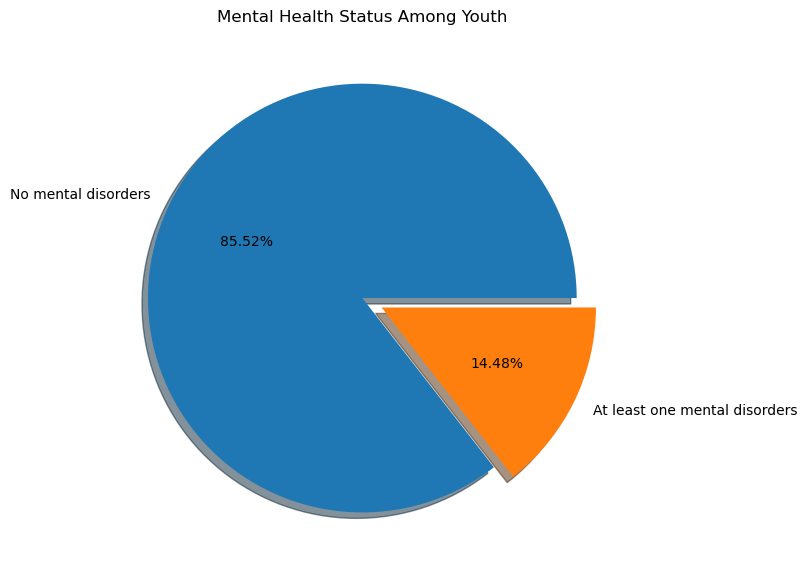

In [25]:
# Mapping the values 
labels =  ['No mental disorders', 'At least one mental disorders']
sizes = data['mental disorder'].value_counts()

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(
    sizes, 
    explode=[0, 0.1], 
    labels=labels, 
    autopct='%1.2f%%', 
    shadow=True, 
)

ax.set_title('Mental Health Status Among Youth')
ax.set_ylabel('')  # Remove y-axis label

# Display the plot
plt.tight_layout()
plt.savefig('prevalence_c.png')
plt.show()


In [26]:
#Create comorbidity levels
def assign_comorbidity_level(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2
    elif n > 2:
        return 3
    else:
        return 0

dfs['comorbidity_level'] = dfs['yes_counts'].apply(assign_comorbidity_level)

In [27]:
dfs['comorbidity_level'].value_counts()

comorbidity_level
0    4465
1     507
2     153
3      96
Name: count, dtype: int64

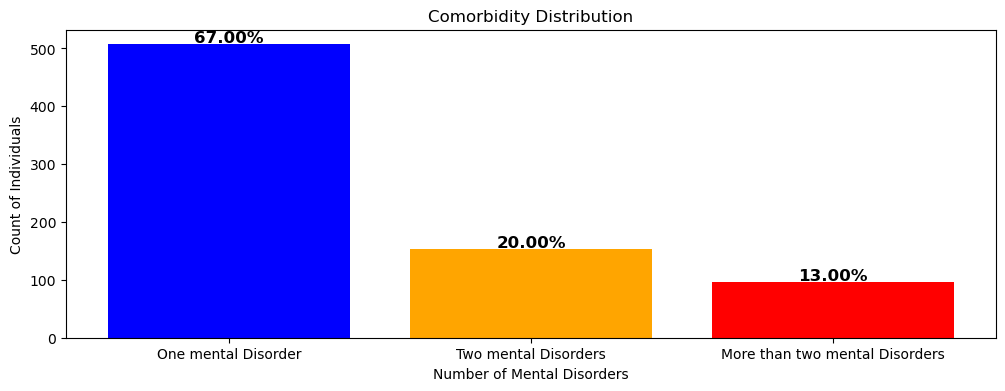

In [28]:
categories = ["One mental Disorder", "Two mental Disorders", "More than two mental Disorders"]
values = dfs['comorbidity_level'].value_counts().sort_index().loc[lambda x: x.index != 0]

total = sum(values)
percentages = [round((v / total) * 100) for v in values]

plt.bar(categories, values, color=['blue', 'orange', 'red'])
plt.xlabel("Number of Mental Disorders")
plt.ylabel("Count of Individuals")
plt.title("Comorbidity Distribution")
#for i, v in enumerate(values):
#    plt.text(i, v + 3, str(v), ha='center', fontsize=12, fontweight='bold')
for i, (v, p) in enumerate(zip(values, percentages)):
    plt.text(i, v + 3, f"{p:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.savefig("comorbidity_c.png")
plt.show()

In [29]:
# check data for missing values
data.isnull().sum()

Sex                              0
education                        0
marital status                   0
employment                       0
religion                         0
age                              0
Mental health history            0
Medical condition experience     0
heavy drinking                   0
violence experience              0
trauma experience                0
lifetime loss                    0
affiliation pro-social group     0
family history mental illness    0
mental disorder                  0
dtype: int64

In [30]:
data['comorbidity_level']=dfs['comorbidity_level']

In [31]:
# count
data['comorbidity_level'].value_counts()

comorbidity_level
0    4465
1     507
2     153
3      96
Name: count, dtype: int64

In [32]:
# summarize the number of rows with missing values for each column
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data,
        percent_of_missing_data#
    ],
    axis=1,
    keys=['Total', 'Percent']
)
print(missing_data.head(30))

                               Total  Percent
Sex                                0      0.0
education                          0      0.0
marital status                     0      0.0
employment                         0      0.0
religion                           0      0.0
age                                0      0.0
Mental health history              0      0.0
Medical condition experience       0      0.0
heavy drinking                     0      0.0
violence experience                0      0.0
trauma experience                  0      0.0
lifetime loss                      0      0.0
affiliation pro-social group       0      0.0
family history mental illness      0      0.0
mental disorder                    0      0.0
comorbidity_level                  0      0.0


In [ ]:
## Data preprocessing

In [33]:

data['education'] = data['education'].replace('Illiterate, and primary not completed', 'No education')
data['education'] = data['education'].replace(['Secondary/TVET','University'], 'Secondary/higher')
data['education'] = data['education'].replace('Primary school', 'Primary')

In [34]:
data['employment'] = data['employment'].replace('Under age of laborforce', 'Unemployed')
data['employment'] = data['employment'].replace(['Self-employed','Salaried employee'], 'Employed')


In [35]:
data['marital status'].value_counts()

marital status
Never married                    4343
Living together as if married     600
Married                           244
Divorced/Separated                 28
Widowed                             6
Name: count, dtype: int64

In [36]:
data['marital status'] = data['marital status'].replace(['Divorced/Separated','Widowed'], 'Separated')
data['marital status'] = data['marital status'].replace(['Married','Living together as if married'], 'Married')


In [37]:
data['marital status'].value_counts()

marital status
Never married    4343
Married           844
Separated          34
Name: count, dtype: int64

In [38]:
data['religion']=data['religion'].replace(['Other','None'],'Other/None')

In [39]:
data['age_group'] = data['age'].apply(lambda x: 1 if x <=18 else 2)
classification_labels = {1: 'Adolescent', 2: 'young adults'}
data['age_group']= data['age_group'].map(classification_labels)
data['age_group']

0        young adults
7        young adults
14       young adults
15       young adults
18         Adolescent
             ...     
20367    young adults
20368      Adolescent
20369      Adolescent
20371    young adults
20380    young adults
Name: age_group, Length: 5221, dtype: object

## Bivariate analysis

In [40]:
## Bivariate analysis

independent_vars=['Sex', 'education', 'marital status', 'employment',
       'religion', 'Mental health history',
       'Medical condition experience', 'heavy drinking', 'violence experience',
       'trauma experience', 'lifetime loss',
       'affiliation pro-social group', 'family history mental illness', 'age_group']

results = []

for var in independent_vars:
    # Create the contingency table
    table = pd.crosstab(data[var], data['mental disorder'])
    
    # Compute the chi-square test
    chi2, p, dof, ex = chi2_contingency(table)
    
    # Append the results with counts
    for level in table.index:
        No_mental=table.loc[level][0]
        Any_mental=table.loc[level][1]
        total_count = No_mental +  Any_mental
        No_mental_percent = (No_mental / total_count) * 100
        Any_mental_percent = ( Any_mental / total_count) * 100
        # Percentage of total counts in the dataset
        total_percent = total_count / len(data) * 100  
        results.append({
            'Characteristic': var,
            'Category': level,
            'Counts':  f"{total_count} ({total_percent:.1f})",
            'No mental disorders': f"{No_mental} ({No_mental_percent:.1f})",
            'mental disorders': f"{Any_mental} ({Any_mental_percent:.1f})",
            'p-value': p
        })

# Create a results DataFrame
results_df = pd.DataFrame(results)
results_df.to_excel('bivariates.xlsx')
# Display the results
print(results_df)

                   Characteristic          Category       Counts  \
0                             Sex            Female  2956 (56.6)   
1                             Sex              Male  2265 (43.4)   
2                       education      No education   541 (10.4)   
3                       education           Primary  2951 (56.5)   
4                       education  Secondary/higher  1729 (33.1)   
5                  marital status         Separated     34 (0.7)   
6                  marital status           Married   844 (16.2)   
7                  marital status     Never married  4343 (83.2)   
8                      employment          Employed    309 (5.9)   
9                      employment        Unemployed  4912 (94.1)   
10                       religion         Christian  4982 (95.4)   
11                       religion            Muslim    126 (2.4)   
12                       religion        Other/None    113 (2.2)   
13          Mental health history               

In [41]:
data.columns

Index(['Sex', 'education', 'marital status', 'employment', 'religion', 'age',
       'Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss', 'affiliation pro-social group',
       'family history mental illness', 'mental disorder', 'comorbidity_level',
       'age_group'],
      dtype='object')

In [42]:
data['lifetime loss'].value_counts()

lifetime loss
No     2971
Yes    2250
Name: count, dtype: int64

In [43]:
##Encoding categorical variables by using map function
data['Sex']=data.Sex.map({'Female': 0 , 'Male': 1})
data['education']=data.education.map({'No education': 0,'Primary': 1,'Secondary/higher':2})
data['marital status']=data['marital status'].map({'Never married': 0,'Married': 1, 'Separated':2})
data['employment']=data.employment.map({'Unemployed': 0,'Employed': 1})
data['religion']=data.religion.map({'Other/None':0, 'Muslim':1, 'Christian':2})
data['age_group']=data.age_group.map({'Adolescent':0,'young adults': 1})
data['Mental health history']=data['Mental health history'].map({'No': 0,'Yes': 1})
data['Medical condition experience']=data['Medical condition experience'].map({'No': 0,'Yes': 1})
data['heavy drinking']=data['heavy drinking'].map({'No': 0,'Yes': 1})
data['violence experience']=data['violence experience'].map({'No': 0,'Yes': 1})
data['trauma experience']=data['trauma experience'].map({'No': 0,'Yes': 1})
data['lifetime loss']=data['lifetime loss'].map({'No': 0,'Yes': 1})
data['affiliation pro-social group']=data['affiliation pro-social group'].map({'No': 0,'Yes': 1})
data['family history mental illness']=data['family history mental illness'].map({'No': 0,'Yes': 1})

In [44]:
data.columns

Index(['Sex', 'education', 'marital status', 'employment', 'religion', 'age',
       'Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss', 'affiliation pro-social group',
       'family history mental illness', 'mental disorder', 'comorbidity_level',
       'age_group'],
      dtype='object')

In [45]:
data['trauma experience'].value_counts()

trauma experience
0    4666
1     555
Name: count, dtype: int64

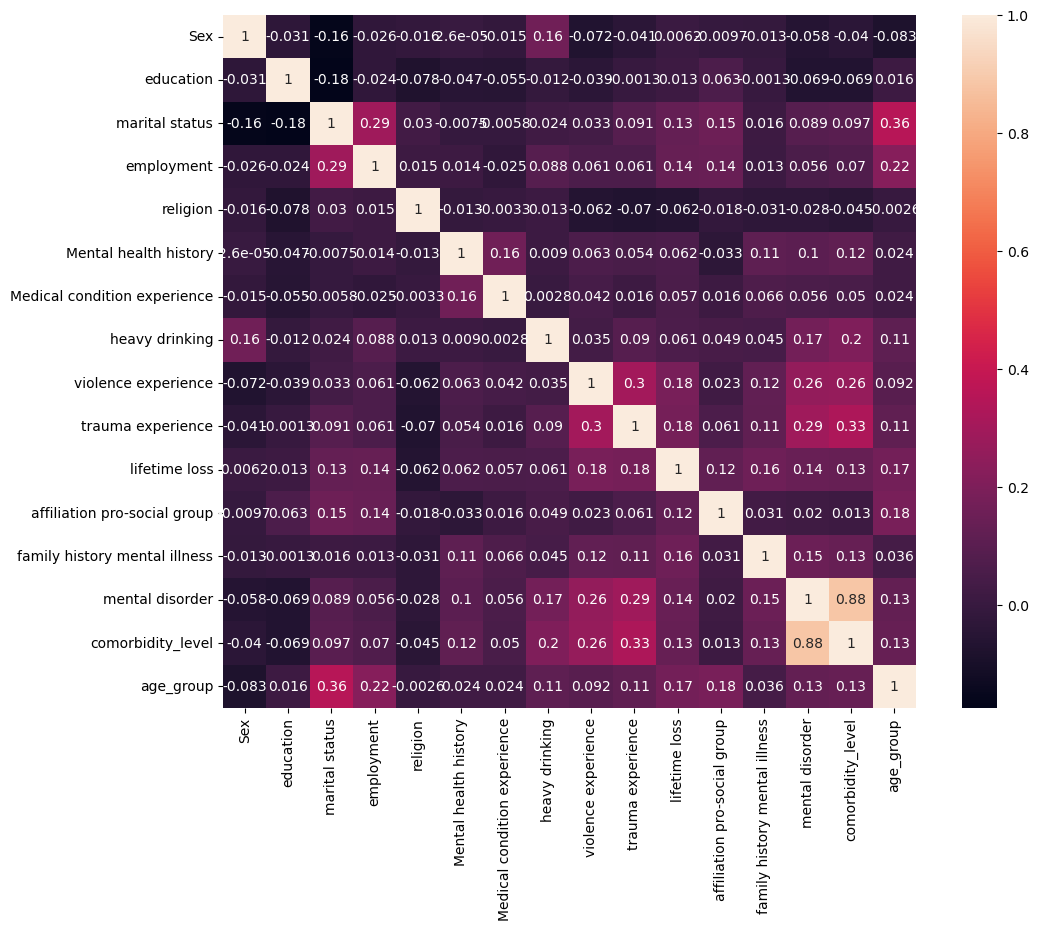

In [46]:

#correlation matrix
corrmat = data.drop('age', axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);
plt.savefig('correlation.png', bbox_inches='tight')
plt.show()
#plt.close(fig) 
     

In [47]:
#Encoding data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Sex [0, 1]
label_education [0, 1, 2]
label_marital status [0, 1, 2]
label_employment [0, 1]
label_religion [0, 1, 2]
label_age [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
label_Mental health history [0, 1]
label_Medical condition experience [0, 1]
label_heavy drinking [0, 1]
label_violence experience [0, 1]
label_trauma experience [0, 1]
label_lifetime loss [0, 1]
label_affiliation pro-social group [0, 1]
label_family history mental illness [0, 1]
label_mental disorder [0, 1]
label_comorbidity_level [0, 1, 2, 3]
label_age_group [0, 1]


In [48]:
# ### Creating dummies variables
col=[ 'Sex', 'marital status','employment',
     'education','religion', 'age_group']
new_df= pd.get_dummies(data, columns=col, prefix=col, drop_first=False)

for colu in new_df.select_dtypes(include=['object', 'bool']).columns:
    new_df[colu] = new_df[colu].map({True: 1, False: 0})

new_df.head()

,age,Mental health history,Medical condition experience,heavy drinking,violence experience,trauma experience,lifetime loss,affiliation pro-social group,family history mental illness,mental disorder,comorbidity_level,Sex_0,Sex_1,marital status_0,marital status_1,marital status_2,employment_0,employment_1,education_0,education_1,education_2,religion_0,religion_1,religion_2,age_group_0,age_group_1
0,9,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1
7,5,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1
14,6,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1
15,4,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
18,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0


## comorbidity modeling

In [49]:
# Define features and target
dataf= new_df[new_df['comorbidity_level'] > 0]

X=dataf.drop(['age','mental disorder','comorbidity_level'], axis=1)
y=dataf['comorbidity_level']


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [51]:
# Handle class imbalance using SMOTE 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [80]:

# Initialize and train the Random Forest model
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rf.fit(X_train_res, y_train_res)

# Predict and evaluate on the test set
y_pred = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.84      0.82       102
           2       0.50      0.32      0.39        31
           3       0.61      0.74      0.67        19

    accuracy                           0.72       152
   macro avg       0.63      0.63      0.62       152
weighted avg       0.71      0.72      0.71       152

Confusion Matrix:
[[86  9  7]
 [19 10  2]
 [ 4  1 14]]


In [81]:
X.columns

Index(['Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss', 'affiliation pro-social group',
       'family history mental illness', 'Sex_Female', 'Sex_Male',
       'marital status_Never married', 'marital status_Married',
       'marital status_Separated/divorced', 'employment_unemployed',
       'employment_employed', 'education_No education', 'education_Primary',
       'education_Secondary/Higher', 'religion_other/None', 'religion_Muslim',
       'religion_Christian', 'age_group_Adolescent', 'age_group_Young adults'],
      dtype='object')

<Figure size 1500x1200 with 0 Axes>

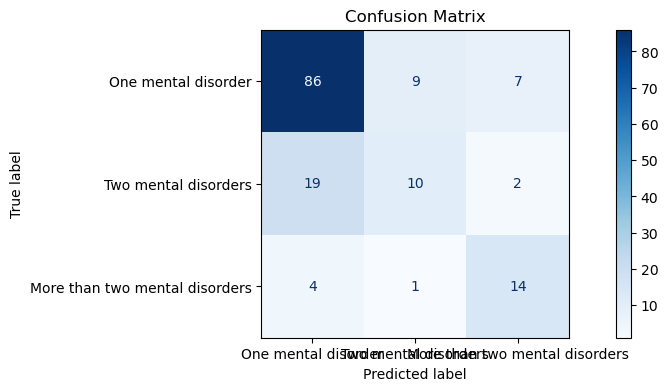

In [82]:
# Plot the confusion matrix
class_names = ['One mental disorder', 'Two mental disorders', 'More than two mental disorders']
plt.figure(figsize=(15,12))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')

plt.savefig('Confusion_matrix_comorbidity.png' )
plt.show()

In [74]:
## performance metrics cal
# Initialize Random Forest
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

# AUC for multiclass
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])  # update if your classes differ
auc_score = roc_auc_score(y_test_bin, y_pred_proba, average='weighted', multi_class='ovr')

# Build results
model_results = pd.DataFrame([{
    'Model': 'Random Forest',
    'Precision_score': round(precision_score(y_test, y_pred, average='weighted'), 3),
    'Recall_score': round(recall_score(y_test, y_pred, average='weighted'), 3),
    'F1_score': round(f1_score(y_test, y_pred, average='weighted'), 3),
    'Accuracy': round(accuracy_score(y_test, y_pred), 3),
    'AUC_score': round(auc_score, 3)
}])

model_results 
# Save to Excel
model_results.to_excel('Results_RF.xlsx', index=False)

,Model,Precision_score,Recall_score,F1_score,Accuracy,AUC_score
0,Random Forest,0.758,0.75,0.711,0.75,0.738


In [75]:
## Rename columns
dictm={0:'Mental health history', 1:'Medical condition experience',
       2:'heavy drinking', 3:'violence experience', 4:'trauma experience',
       5:'lifetime loss', 6:'affiliation pro-social group',
       7:'family history mental illness', 8:'Sex_Female', 9:'Sex_Male', 10:'marital status_Never married',
       11:'marital status_Married', 12:'marital status_Separated/divorced', 13:'employment_unemployed', 14:'employment_employed',
       15:'education_No education', 16:'education_Primary', 17:'education_Secondary/Higher', 18:'religion_other/None', 19:'religion_Muslim',
       20:'religion_Christian', 21:'age_group_Adolescent', 22: 'age_group_Young adults'}

X.columns=dictm.values()

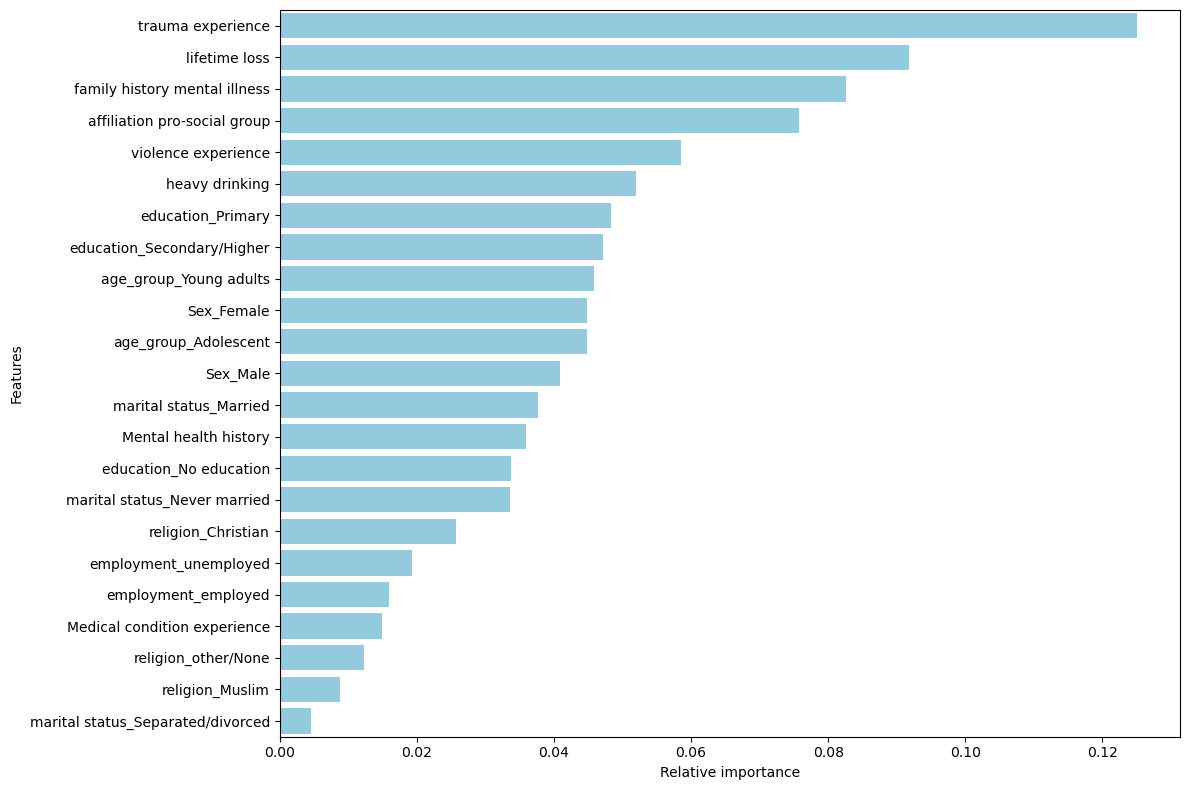

In [83]:
## Feature importances

importances = rf.feature_importances_
feature_names = X.columns  # These are your one-hot encoded column names

# Create a DataFrame for visualization
feat_importances = pd.DataFrame({
    "Features": feature_names,
    "Relative importance": importances
}).sort_values(by="Relative importance", ascending=False)

# Plot important features
plt.figure(figsize=(12, 8))
sns.barplot(x="Relative importance", y="Features", data=feat_importances.head(33),color='skyblue')
#plt.title("Important Features predicting ")
plt.tight_layout()
plt.savefig('feature importances_comorbidity.png' )
plt.show()